In [48]:
import sqlite3, matplotlib.pyplot as plt, pandas as pd, base64, io
%matplotlib inline
connection = sqlite3.connect('database.db')
pd.set_option('display.max_rows', 500)

def display_image(row, image_data):
    decoded_image = io.BytesIO(base64.b64decode(row[image_data]))
    img = plt.imread(decoded_image, format='png')
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(f"{row['architecture']} ({row['configuration_id']})", fontsize=20, fontweight='bold')
    plt.axis('off')
    plt.show()

## Will techniques prevent overfitting?

In [24]:
df = pd.read_sql_query("""
    SELECT cf.*
    FROM configuration AS cf;
""", connection)
df

,id,transfer_learning,freeze_layers,balance_classes,segmentation,data_augmentation,normalization,custom_optimizer,callback
0,1,True,True,True,True,True,None,True,False
1,2,True,True,True,False,False,StandardScaler,False,False
2,3,False,False,False,False,True,None,False,False
3,4,False,False,False,False,False,None,False,False
4,5,False,False,True,False,False,None,False,False
5,6,False,False,False,True,False,None,False,False
6,7,True,True,False,False,False,None,False,False
7,8,True,True,False,False,True,None,False,False
8,9,True,True,True,False,True,None,False,False
9,10,True,True,True,False,True,MinMaxScaler,True,False


Overfitting can be referenced by:

* Large gap between validation and training curves

* Validation curve with noise and instability compared to training curve

Underfitting can be referenced by:

* Validation and training curves decreasing accuracy over the epochs

* Validation and training curves increasing loss over the epochs

The perfect match would be similar to a logarithmic curve

In [25]:
df = pd.read_sql_query("""
    SELECT nb.architecture, nb.loss_epochs, nb.accuracy_epochs, nb.auc_epochs, nb.recall_epochs, nb.precision_epochs, nb.configuration_id
    FROM notebook AS nb;
""", connection)

for index, row in df.iterrows():
    print(row['configuration_id'], row['architecture'])
    #display_image(row['accuracy_epochs'])
    #display_image(row['loss_epochs'])
    #display_image(row['auc_epochs'])
    #display_image(row['recall_epochs'])
    #display_image(row['precision_epochs'])

1 ConvNeXt
1 ResNetV2
1 Xception
2 ConvNeXt
2 ResNetV2
2 Xception
3 ConvNeXt
3 ResNetV2
3 Xception
4 ConvNeXt
4 ResNetV2
4 Xception
5 ConvNeXt
5 ResNetV2
5 Xception
6 ConvNeXt
6 ResNetV2
6 Xception
7 ConvNeXt
7 ResNetV2
7 Xception
8 ConvNeXt
8 ResNetV2
8 Xception
9 ConvNeXt
9 ResNetV2
9 Xception
10 ConvNeXt
10 ResNetV2
11 ConvNeXt
11 ResNetV2
11 Xception
12 ConvNeXt
12 ResNetV2
12 Xception
13 ConvNeXt
13 ResNetV2
13 Xception
14 ConvNeXt
14 ResNetV2
14 Xception
15 ConvNeXt
15 ResNetV2
15 Xception
16 ConvNeXt
16 ResNetV2
16 Xception
17 ConvNeXt
17 ResNetV2
17 Xception
18 ConvNeXt
18 ResNetV2
18 Xception
19 ConvNeXt
19 ResNetV2
19 Xception
20 ConvNeXt
20 ResNetV2
20 Xception
21 ConvNeXt
21 ResNetV2
21 Xception
22 ConvNeXt
22 ResNetV2
22 Xception


There weren't a perfect match of accuracy and loss where the graphics looked like a perfect logarithmic graph, when accuracy or loss reached this shape the other metric didn't, most of the time the validation curve got the opposite way of training curve or had a stable curve at zero or also an unbalance during training. Most of trainings have been overfitted or underfitted. Worth to note that is important to take a look at every point of view, visualizing metrics, graphs and confusion matrixes, the analysis cannot look only into one or two metrics, but in whole extraction of a training.

## A model with more layers will have better results compared to others?

### Better results considering metrics from each model training
In terms of metrics, the query below shows how many classes of each model (configurationId) have all metrics value higher than 50%

In [26]:
df = pd.read_sql_query("""
    SELECT nb.architecture || ' (' || nb.configuration_id ||')' as name, count(*) as total
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.precision > .5 AND met.f1_score > .5 AND met.roc_auc > .5 AND met.specificity > .5 AND met.recall > .5 AND nb.accuracy > .5
    GROUP BY nb.name
    ORDER BY count(*) DESC;
""", connection)
df

,name,total
0,ConvNeXt (8),7
1,ConvNeXt (7),4
2,ConvNeXt (9),4
3,ConvNeXt (20),3
4,Xception (16),2
5,ResNetV2 (19),2
6,ResNetV2 (16),2
7,ConvNeXt (12),2
8,ConvNeXt (19),2
9,ConvNeXt (17),2


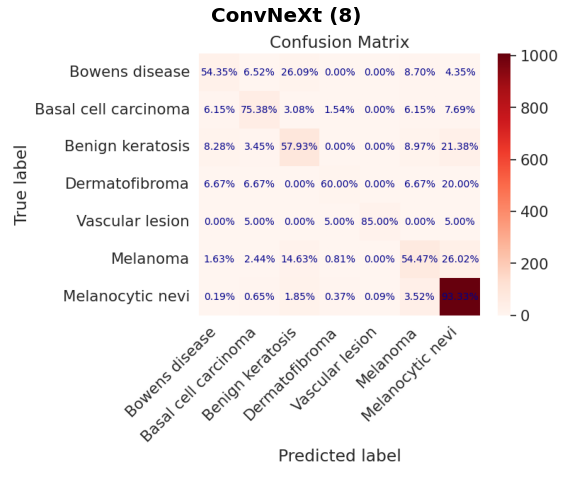

In [27]:
df = pd.read_sql_query("""
    SELECT nb.confusion_matrix, nb.architecture, nb.configuration_id
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.precision > .5 and met.f1_score > .5 and met.roc_auc > .5 and met.specificity > .5 and met.recall > .5 and nb.accuracy > .5
    group by nb.name
    ORDER BY count(*) DESC
    LIMIT 1;
""", connection)
for id, row in df.iterrows():
    display_image(row,'confusion_matrix')

Indeed ConvNeXt has more classes with all metrics above 50%

### Mean metric values from notebooks
Average metrics from each architecture

In [28]:
df = pd.read_sql_query("""
    SELECT nb.architecture, AVG(nb.loss) AS average_loss, AVG(nb.accuracy) AS average_accuracy, AVG(nb.auc) AS average_auc, AVG(nb.recall) AS average_recall, AVG(nb.precision) AS average_precision
    FROM notebook AS nb
    GROUP BY nb.architecture;
""", connection)
df

,architecture,average_loss,average_accuracy,average_auc,average_recall,average_precision
0,ConvNeXt,6.661447,0.356665,0.903273,0.714068,0.769718
1,ResNetV2,297.783941,0.579304,0.846561,0.668583,0.709733
2,Xception,263.880040,0.576510,0.831346,0.646140,0.679708


ConvNeXt has the best results, except for average accuracy which Xception performed better, however considering the other metrics, Xception would be the third

### Mean metric values from classes

In [29]:
df = pd.read_sql_query("""
    SELECT met.type, AVG(met.precision) AS average_precision, AVG(met.f1_score) AS average_f1_score, AVG(met.roc_auc) AS average_ROC_AUC, AVG(met.recall) AS average_recall, AVG(met.specificity) AS average_specificity
    FROM metrics AS met
    GROUP BY met.type;
""", connection)
df

,type,average_precision,average_f1_score,average_ROC_AUC,average_recall,average_specificity
0,Basal_cell_carcinoma,0.377030,0.327862,0.817211,0.366627,0.963955
1,Benign_keratosis,0.409129,0.357120,0.784323,0.391300,0.926829
2,Bowens_disease,0.311828,0.259405,0.797140,0.276254,0.978708
3,Dermatofibroma,0.229533,0.177809,0.750083,0.221538,0.983804
4,Melanocytic_nevi,0.884630,0.848946,0.831276,0.836339,0.689781
5,Melanoma,0.376616,0.301727,0.758600,0.314822,0.941850
6,Vascular_lesion,0.434292,0.344424,0.786050,0.390000,0.976610


In [30]:
df = pd.read_sql_query("""
    SELECT nb.architecture, met.type, AVG(met.precision) AS average_precision, AVG(met.f1_score) AS average_f1_score, AVG(met.roc_auc) AS average_ROC_AUC, AVG(met.recall) AS average_recall, AVG(met.specificity) AS average_specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    GROUP BY met.type,nb.architecture;
""", connection)
df

,architecture,type,average_precision,average_f1_score,average_ROC_AUC,average_recall,average_specificity
0,ConvNeXt,Basal_cell_carcinoma,0.445824,0.431698,0.888470,0.460839,0.974680
1,ResNetV2,Basal_cell_carcinoma,0.338364,0.296981,0.792923,0.369930,0.943603
2,Xception,Basal_cell_carcinoma,0.345466,0.251434,0.768005,0.264469,0.974041
3,ConvNeXt,Benign_keratosis,0.432662,0.394221,0.835959,0.400627,0.949660
4,ResNetV2,Benign_keratosis,0.441890,0.339197,0.747879,0.362382,0.927589
5,Xception,Benign_keratosis,0.350155,0.337029,0.768409,0.411823,0.902114
6,ConvNeXt,Bowens_disease,0.360974,0.316194,0.872897,0.334980,0.978246
7,ResNetV2,Bowens_disease,0.306649,0.216649,0.748930,0.204545,0.985748
8,Xception,Bowens_disease,0.265767,0.244704,0.768280,0.289855,0.971817
9,ConvNeXt,Dermatofibroma,0.396185,0.270841,0.808627,0.242424,0.996527


ConvNeXt = C, ResNetV2 = R, Xception = X

Type | Precision | F1 Score | ROC AUC | Recall | Specificity
:---: | :---: | :---: | :---: | :---: | :---:
Basal_cell_carcinoma | C | C | C | C | C
Benign_keratosis | R | C | C | X | C
Bowens_disease | C | C | C | C | R
Dermatofibroma | C | C | C | C | C
Melanocytic_nevi | X | C | C | C | X
**Melanoma** | C | C | C | X | C
Vascular_lesion | C | C | C | C | C

In [31]:
df = pd.read_sql_query("""
    SELECT nb.architecture, AVG(met.precision) AS average_precision, AVG(met.f1_score) AS average_f1_score, AVG(met.roc_auc) AS average_ROC_AUC, AVG(met.recall) AS average_recall, AVG(met.specificity) AS average_specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    GROUP BY nb.architecture;
""", connection)
df

,architecture,average_precision,average_f1_score,average_ROC_AUC,average_recall,average_specificity
0,ConvNeXt,0.504085,0.453150,0.850355,0.458270,0.926920
1,ResNetV2,0.412843,0.337121,0.758583,0.367339,0.921956
2,Xception,0.376134,0.329404,0.757334,0.371792,0.920224


After analysis, the inference is the ConvNeXt architecture have best overall metrics values, in other words, an architecture with more layers performed better than others

## What would be the impact of each technique?

In [57]:
df = pd.read_sql_query("""
    SELECT cf.id AS conf_id, cf.data_augmentation, cf.transfer_learning, cf.segmentation, cf.balance_classes, AVG(nb.loss) AS average_loss, AVG(nb.accuracy) AS average_accuracy, AVG(nb.auc) AS average_auc, AVG(nb.recall) AS average_recall, AVG(nb.precision) AS average_precision
    FROM notebook AS nb JOIN configuration AS cf ON cf.id = nb.configuration_id
    GROUP BY cf.id;
""", connection)
df

,conf_id,data_augmentation,transfer_learning,segmentation,balance_classes,average_loss,average_accuracy,average_auc,average_recall,average_precision
0,1,True,True,True,True,4.434999,0.123478,0.875329,0.707497,0.719702
1,2,False,True,False,True,28.467390,0.744502,0.847069,0.723338,0.723338
2,3,True,False,False,False,1.025738,0.003665,0.946757,0.703034,0.755215
3,4,False,False,False,False,0.836105,0.000414,0.944088,0.626506,0.834031
4,5,False,False,False,True,4.032384,0.061452,0.806936,0.347613,0.602892
5,6,False,False,True,False,0.748712,0.002040,0.953680,0.688309,0.823954
6,7,False,True,False,False,723.806834,0.842800,0.771175,0.601963,0.602144
7,8,True,True,False,False,394.568133,0.910722,0.862120,0.762383,0.762383
8,9,True,True,False,True,384.992309,0.917575,0.862257,0.761490,0.761490
9,10,True,True,False,True,1.180195,0.000000,0.886532,0.391232,0.692097


Metric | Best | Worst
:---: | :---: | :---:
Loss | 6 | 12
Accuracy | 9 | 10
AUC | 6 | 7
Recall | 19 | 5
Precision | 4 | 7

Apparent best configurationId = 6

Apparent worst configurationId = 7

### Data augmentation
configurationIds = 3 & 4 | 7 & 8 | 1 & 14 | 9 & 12 | 11 & 13

#### Configurations 3 (w/) & 4 (w/o)

In [33]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (3,4)
    ORDER BY nb.architecture, met."type";
""", connection)
df

,configuration_id,architecture,loss,accuracy,precision,recall,auc,type,precision,f1_score,roc_auc,recall,specificity
0,3,ConvNeXt,0.991117,0.000765,0.747552,0.715529,0.944856,Basal_cell_carcinoma,0.571429,0.491228,0.933348,0.430769,0.985304
1,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Basal_cell_carcinoma,0.448276,0.276596,0.939893,0.200000,0.988803
2,3,ConvNeXt,0.991117,0.000765,0.747552,0.715529,0.944856,Benign_keratosis,0.409722,0.408304,0.859252,0.406897,0.936990
3,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Benign_keratosis,0.325000,0.231111,0.774316,0.179310,0.959970
4,3,ConvNeXt,0.991117,0.000765,0.747552,0.715529,0.944856,Bowens_disease,0.283333,0.320755,0.902129,0.369565,0.970304
5,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Bowens_disease,0.192308,0.138889,0.876231,0.108696,0.985497
6,3,ConvNeXt,0.991117,0.000765,0.747552,0.715529,0.944856,Dermatofibroma,0.375000,0.387097,0.941131,0.400000,0.993239
7,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Dermatofibroma,0.000000,0.000000,0.920622,0.000000,1.000000
8,3,ConvNeXt,0.991117,0.000765,0.747552,0.715529,0.944856,Melanocytic_nevi,0.899119,0.873870,0.898045,0.850000,0.751208
9,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Melanocytic_nevi,0.785607,0.868268,0.871075,0.970370,0.309179


Overall, all notebooks with data augmentation had a higher loss and stability in metrics.

In terms of classes, cancers with fewer examples had a significative improvement, other types had a decrease in metrics, however it shows a stability over the metrics in most cases

About the melanoma class - all architectures had a better performance with data augmentation

#### Configurations 7 (w/o) & 8 (w/)

In [34]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (7,8)
    ORDER BY nb.architecture, met."type";
""", connection)
df

,configuration_id,architecture,loss,accuracy,precision,recall,auc,type,precision,f1_score,roc_auc,recall,specificity
0,7,ConvNeXt,9.860565,0.823580,0.809109,0.808568,0.898529,Basal_cell_carcinoma,0.567164,0.575758,0.922178,0.584615,0.979706
1,8,ConvNeXt,13.903800,0.895391,0.842704,0.842704,0.910296,Basal_cell_carcinoma,0.710145,0.731343,0.926328,0.753846,0.986004
2,7,ConvNeXt,9.860565,0.823580,0.809109,0.808568,0.898529,Benign_keratosis,0.508982,0.544872,0.887866,0.586207,0.939214
3,8,ConvNeXt,13.903800,0.895391,0.842704,0.842704,0.910296,Benign_keratosis,0.617647,0.597865,0.867682,0.579310,0.961453
4,7,ConvNeXt,9.860565,0.823580,0.809109,0.808568,0.898529,Bowens_disease,0.608696,0.405797,0.864851,0.304348,0.993785
5,8,ConvNeXt,13.903800,0.895391,0.842704,0.842704,0.910296,Bowens_disease,0.543478,0.543478,0.882266,0.543478,0.985497
6,7,ConvNeXt,9.860565,0.823580,0.809109,0.808568,0.898529,Dermatofibroma,1.000000,0.235294,0.697543,0.133333,1.000000
7,8,ConvNeXt,13.903800,0.895391,0.842704,0.842704,0.910296,Dermatofibroma,0.562500,0.580645,0.895831,0.600000,0.995267
8,7,ConvNeXt,9.860565,0.823580,0.809109,0.808568,0.898529,Melanocytic_nevi,0.898320,0.919041,0.883058,0.940741,0.722222
9,8,ConvNeXt,13.903800,0.895391,0.842704,0.842704,0.910296,Melanocytic_nevi,0.931608,0.932470,0.894331,0.933333,0.821256


All metrics were improved with data augmentation, except for loss.

Metrics within classes had the clear demonstration of stability and improvement with data augmentation

Melanoma class - Conxnext and resnetv2 had better performances with data augmentation while xception not

#### Configurations 1 (w/) & 14 (w/o)

In [35]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (1,14)
    ORDER BY nb.architecture, met."type";
""", connection)
df

,configuration_id,architecture,loss,accuracy,precision,recall,auc,type,precision,f1_score,roc_auc,recall,specificity
0,1,ConvNeXt,0.473472,0.000000,0.851671,0.818608,0.981422,Basal_cell_carcinoma,0.761905,0.750000,0.987242,0.738462,0.989503
1,14,ConvNeXt,0.614947,0.000000,0.832959,0.744311,0.967933,Basal_cell_carcinoma,0.520000,0.557143,0.969489,0.600000,0.974808
2,1,ConvNeXt,0.473472,0.000000,0.851671,0.818608,0.981422,Benign_keratosis,0.591549,0.585366,0.921198,0.579310,0.957005
3,14,ConvNeXt,0.614947,0.000000,0.832959,0.744311,0.967933,Benign_keratosis,0.538922,0.576923,0.927757,0.620690,0.942921
4,1,ConvNeXt,0.473472,0.000000,0.851671,0.818608,0.981422,Bowens_disease,0.480000,0.338028,0.962992,0.260870,0.991022
5,14,ConvNeXt,0.614947,0.000000,0.832959,0.744311,0.967933,Bowens_disease,0.456140,0.504854,0.958924,0.565217,0.978591
6,1,ConvNeXt,0.473472,0.000000,0.851671,0.818608,0.981422,Dermatofibroma,0.875000,0.608696,0.976020,0.466667,0.999324
7,14,ConvNeXt,0.614947,0.000000,0.832959,0.744311,0.967933,Dermatofibroma,0.333333,0.363636,0.943881,0.400000,0.991886
8,1,ConvNeXt,0.473472,0.000000,0.851671,0.818608,0.981422,Melanocytic_nevi,0.919164,0.928015,0.957582,0.937037,0.785024
9,14,ConvNeXt,0.614947,0.000000,0.832959,0.744311,0.967933,Melanocytic_nevi,0.951346,0.898338,0.943968,0.850926,0.886473


Improvement of metrics, except for xception. Loss performed better with data augmentation for all architectures.

For convnext all classes had an improvement in metric values, for resnet some classes had not an improvement in 2 classes however the equality over metrics could be noted. For xception, some classes improved but without equality

For the melanoma class, data augmentation had an improvement in metrics

#### Configurations 9 (w/) & 12 (w/o)

In [36]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (9,12)
    ORDER BY nb.architecture, met."type";
""", connection)
df

,configuration_id,architecture,loss,accuracy,precision,recall,auc,type,precision,f1_score,roc_auc,recall,specificity
0,9,ConvNeXt,21.231993,0.909352,0.815261,0.815261,0.896011,Basal_cell_carcinoma,0.578313,0.648649,0.914502,0.738462,0.975507
1,12,ConvNeXt,12.785114,0.716963,0.705291,0.704819,0.845576,Basal_cell_carcinoma,0.645833,0.548673,0.925672,0.476923,0.988104
2,9,ConvNeXt,21.231993,0.909352,0.815261,0.815261,0.896011,Benign_keratosis,0.539394,0.574194,0.862059,0.613793,0.943662
3,12,ConvNeXt,12.785114,0.716963,0.705291,0.704819,0.845576,Benign_keratosis,0.379679,0.427711,0.857746,0.489655,0.914010
4,9,ConvNeXt,21.231993,0.909352,0.815261,0.815261,0.896011,Bowens_disease,0.571429,0.266667,0.762964,0.173913,0.995856
5,12,ConvNeXt,12.785114,0.716963,0.705291,0.704819,0.845576,Bowens_disease,0.333333,0.455172,0.961341,0.717391,0.954420
6,9,ConvNeXt,21.231993,0.909352,0.815261,0.815261,0.896011,Dermatofibroma,0.600000,0.480000,0.829908,0.400000,0.997295
7,12,ConvNeXt,12.785114,0.716963,0.705291,0.704819,0.845576,Dermatofibroma,0.285714,0.400000,0.947307,0.666667,0.983097
8,9,ConvNeXt,21.231993,0.909352,0.815261,0.815261,0.896011,Melanocytic_nevi,0.877430,0.917366,0.829887,0.961111,0.649758
9,12,ConvNeXt,12.785114,0.716963,0.705291,0.704819,0.845576,Melanocytic_nevi,0.948335,0.846745,0.903270,0.764815,0.891304


Loss is higher with data augmentation for convNext, while the other two architectures had lower loss. Metrics with data augmentation improved

About classes, some improved, some not althought it not showed the equality over metrics

For melanoma class, only xception had an improvement in metrics, however not an equality over metrics. For convnext and resnet it not performed well with data augmentation

#### Configurations 11 (w/) & 13 (w/o)

In [37]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (11,13)
    ORDER BY nb.architecture, met."type";
""", connection)
df

,configuration_id,architecture,loss,accuracy,precision,recall,auc,type,precision,f1_score,roc_auc,recall,specificity
0,11,ConvNeXt,0.495621,0.000000,0.855742,0.817938,0.978213,Basal_cell_carcinoma,0.820000,0.713043,0.981709,0.630769,0.993702
1,13,ConvNeXt,0.562903,0.000000,0.839787,0.740295,0.973310,Basal_cell_carcinoma,0.517241,0.592105,0.965409,0.692308,0.970609
2,11,ConvNeXt,0.495621,0.000000,0.855742,0.817938,0.978213,Benign_keratosis,0.659091,0.628159,0.934414,0.600000,0.966642
3,13,ConvNeXt,0.562903,0.000000,0.839787,0.740295,0.973310,Benign_keratosis,0.550633,0.574257,0.927118,0.600000,0.947368
4,11,ConvNeXt,0.495621,0.000000,0.855742,0.817938,0.978213,Bowens_disease,0.636364,0.622222,0.971115,0.608696,0.988950
5,13,ConvNeXt,0.562903,0.000000,0.839787,0.740295,0.973310,Bowens_disease,0.380000,0.395833,0.939046,0.413043,0.978591
6,11,ConvNeXt,0.495621,0.000000,0.855742,0.817938,0.978213,Dermatofibroma,0.800000,0.400000,0.967455,0.266667,0.999324
7,13,ConvNeXt,0.562903,0.000000,0.839787,0.740295,0.973310,Dermatofibroma,0.375000,0.387097,0.950958,0.400000,0.993239
8,11,ConvNeXt,0.495621,0.000000,0.855742,0.817938,0.978213,Melanocytic_nevi,0.897436,0.918137,0.941783,0.939815,0.719807
9,13,ConvNeXt,0.562903,0.000000,0.839787,0.740295,0.973310,Melanocytic_nevi,0.954728,0.915140,0.958510,0.878704,0.891304


Lower loss with data augmentation for all architectures. ConvNext had higher performance (except for accuracy), resnet performed worse with data augmentation, xception looks not changed in terms of equality

Convnext and resnet had better values most of the time but not equality between classes

About melanoma, convnext looks to have an improvement with data augmentation, resnet didn't, xception had an equality between metrics

### Segmentation
configurationIds = 1 & 11 | 4 & 6 | 14 & 13

#### Configurations 1 (w/) & 11 (w/o)

In [38]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (1,11)
    ORDER BY nb.architecture, met."type";
""", connection)
df

,configuration_id,architecture,loss,accuracy,precision,recall,auc,type,precision,f1_score,roc_auc,recall,specificity
0,1,ConvNeXt,0.473472,0.000000,0.851671,0.818608,0.981422,Basal_cell_carcinoma,0.761905,0.750000,0.987242,0.738462,0.989503
1,11,ConvNeXt,0.495621,0.000000,0.855742,0.817938,0.978213,Basal_cell_carcinoma,0.820000,0.713043,0.981709,0.630769,0.993702
2,1,ConvNeXt,0.473472,0.000000,0.851671,0.818608,0.981422,Benign_keratosis,0.591549,0.585366,0.921198,0.579310,0.957005
3,11,ConvNeXt,0.495621,0.000000,0.855742,0.817938,0.978213,Benign_keratosis,0.659091,0.628159,0.934414,0.600000,0.966642
4,1,ConvNeXt,0.473472,0.000000,0.851671,0.818608,0.981422,Bowens_disease,0.480000,0.338028,0.962992,0.260870,0.991022
5,11,ConvNeXt,0.495621,0.000000,0.855742,0.817938,0.978213,Bowens_disease,0.636364,0.622222,0.971115,0.608696,0.988950
6,1,ConvNeXt,0.473472,0.000000,0.851671,0.818608,0.981422,Dermatofibroma,0.875000,0.608696,0.976020,0.466667,0.999324
7,11,ConvNeXt,0.495621,0.000000,0.855742,0.817938,0.978213,Dermatofibroma,0.800000,0.400000,0.967455,0.266667,0.999324
8,1,ConvNeXt,0.473472,0.000000,0.851671,0.818608,0.981422,Melanocytic_nevi,0.919164,0.928015,0.957582,0.937037,0.785024
9,11,ConvNeXt,0.495621,0.000000,0.855742,0.817938,0.978213,Melanocytic_nevi,0.897436,0.918137,0.941783,0.939815,0.719807


Despite the low accuracy of examples, in this comparison, the configuration with segmentation had a slightly better performance for convnext, a notable improvement in resnet, but a decay in xception

Observating all classes, they follow the same overview as the notebooks

About melanoma, for convnext it had a lower performance with segmentation, resnet had an improvement with segmentation and xception an unbalance

#### Configurations 4 (w/o) & 6 (w/)

In [39]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (4,6)
    ORDER BY nb.architecture, met."type";
""", connection)
df

,configuration_id,architecture,loss,accuracy,precision,recall,auc,type,precision,f1_score,roc_auc,recall,specificity
0,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Basal_cell_carcinoma,0.448276,0.276596,0.939893,0.200000,0.988803
1,6,ConvNeXt,0.782848,0.000000,0.798129,0.685408,0.950416,Basal_cell_carcinoma,0.376471,0.426667,0.924907,0.492308,0.962911
2,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Benign_keratosis,0.325000,0.231111,0.774316,0.179310,0.959970
3,6,ConvNeXt,0.782848,0.000000,0.798129,0.685408,0.950416,Benign_keratosis,0.300000,0.294737,0.775174,0.289655,0.927354
4,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Bowens_disease,0.192308,0.138889,0.876231,0.108696,0.985497
5,6,ConvNeXt,0.782848,0.000000,0.798129,0.685408,0.950416,Bowens_disease,0.666667,0.218182,0.872012,0.130435,0.997928
6,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Dermatofibroma,0.000000,0.000000,0.920622,0.000000,1.000000
7,6,ConvNeXt,0.782848,0.000000,0.798129,0.685408,0.950416,Dermatofibroma,0.200000,0.160000,0.947577,0.133333,0.994591
8,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Melanocytic_nevi,0.785607,0.868268,0.871075,0.970370,0.309179
9,6,ConvNeXt,0.782848,0.000000,0.798129,0.685408,0.950416,Melanocytic_nevi,0.837426,0.874834,0.879574,0.915741,0.536232


About the architectures, despite lower accuracy, segmentation changed a little the notebook metrics to better, xception had the most impact followed by resnet and then convnext

For the classes, convnext still desbalanced in most of classes, performing worse than without segmentation, resnet had an improvement in almost all classes. Xception had most of classes with metric value as 0, that is one example of the importance to analyze all points of view.

Melanoma class, performed better with segmentation in resnet and xception, despite of desbalance between classes. About convnext it had a worse performance with segmentation

#### Configurations 13 (w/o) & 14 (w/)

In [40]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (13,14)
    ORDER BY nb.architecture, met."type";
""", connection)
df

,configuration_id,architecture,loss,accuracy,precision,recall,auc,type,precision,f1_score,roc_auc,recall,specificity
0,13,ConvNeXt,0.562903,0.000000,0.839787,0.740295,0.973310,Basal_cell_carcinoma,0.517241,0.592105,0.965409,0.692308,0.970609
1,14,ConvNeXt,0.614947,0.000000,0.832959,0.744311,0.967933,Basal_cell_carcinoma,0.520000,0.557143,0.969489,0.600000,0.974808
2,13,ConvNeXt,0.562903,0.000000,0.839787,0.740295,0.973310,Benign_keratosis,0.550633,0.574257,0.927118,0.600000,0.947368
3,14,ConvNeXt,0.614947,0.000000,0.832959,0.744311,0.967933,Benign_keratosis,0.538922,0.576923,0.927757,0.620690,0.942921
4,13,ConvNeXt,0.562903,0.000000,0.839787,0.740295,0.973310,Bowens_disease,0.380000,0.395833,0.939046,0.413043,0.978591
5,14,ConvNeXt,0.614947,0.000000,0.832959,0.744311,0.967933,Bowens_disease,0.456140,0.504854,0.958924,0.565217,0.978591
6,13,ConvNeXt,0.562903,0.000000,0.839787,0.740295,0.973310,Dermatofibroma,0.375000,0.387097,0.950958,0.400000,0.993239
7,14,ConvNeXt,0.614947,0.000000,0.832959,0.744311,0.967933,Dermatofibroma,0.333333,0.363636,0.943881,0.400000,0.991886
8,13,ConvNeXt,0.562903,0.000000,0.839787,0.740295,0.973310,Melanocytic_nevi,0.954728,0.915140,0.958510,0.878704,0.891304
9,14,ConvNeXt,0.614947,0.000000,0.832959,0.744311,0.967933,Melanocytic_nevi,0.951346,0.898338,0.943968,0.850926,0.886473


General vision of notebooks - convnext had practically almost the same results, resnet had little improvement with segmentation

About the classes most performed equally, some metrics which have been changed, changed to worse than without segmentation, resnet seens to perform desbalanced: some of metrics had improved while others not improved. In xception most classes have improved, others not

Melanoma with segmentation for convnext did not performed as well as without the technique. For resnet, melanoma did not had good results with segmentation. Xception got a worse metrics, but more balanced

### Transfer Learning
configurationIds = 3 & 8 | 4 & 7 | 5 & 12

#### Configurations 3 (w/o) & 8 (w/)

In [41]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (3,8)
    ORDER BY nb.architecture, met."type";
""", connection)
df

,configuration_id,architecture,loss,accuracy,precision,recall,auc,type,precision,f1_score,roc_auc,recall,specificity
0,3,ConvNeXt,0.991117,0.000765,0.747552,0.715529,0.944856,Basal_cell_carcinoma,0.571429,0.491228,0.933348,0.430769,0.985304
1,8,ConvNeXt,13.903800,0.895391,0.842704,0.842704,0.910296,Basal_cell_carcinoma,0.710145,0.731343,0.926328,0.753846,0.986004
2,3,ConvNeXt,0.991117,0.000765,0.747552,0.715529,0.944856,Benign_keratosis,0.409722,0.408304,0.859252,0.406897,0.936990
3,8,ConvNeXt,13.903800,0.895391,0.842704,0.842704,0.910296,Benign_keratosis,0.617647,0.597865,0.867682,0.579310,0.961453
4,3,ConvNeXt,0.991117,0.000765,0.747552,0.715529,0.944856,Bowens_disease,0.283333,0.320755,0.902129,0.369565,0.970304
5,8,ConvNeXt,13.903800,0.895391,0.842704,0.842704,0.910296,Bowens_disease,0.543478,0.543478,0.882266,0.543478,0.985497
6,3,ConvNeXt,0.991117,0.000765,0.747552,0.715529,0.944856,Dermatofibroma,0.375000,0.387097,0.941131,0.400000,0.993239
7,8,ConvNeXt,13.903800,0.895391,0.842704,0.842704,0.910296,Dermatofibroma,0.562500,0.580645,0.895831,0.600000,0.995267
8,3,ConvNeXt,0.991117,0.000765,0.747552,0.715529,0.944856,Melanocytic_nevi,0.899119,0.873870,0.898045,0.850000,0.751208
9,8,ConvNeXt,13.903800,0.895391,0.842704,0.842704,0.910296,Melanocytic_nevi,0.931608,0.932470,0.894331,0.933333,0.821256


About overall metrics, loss and auc performed worse with transfer learning while other metrics had improvement, except for precision in resnet and xception

About classes, in convnext with transfer learning all classes performed with higher values in all metrics, except for roc_auc. In resnet, only dermatofibroma, melanocytic nevi and vascular lesion didn't improved with transfer learning. Xception did not improved in most of classes

Melanoma improved in convnext and resnet, except for roc_auc. In xception it had lower values with transfer learning

#### Configurations 4 (w/o) & 7 (w/)

In [42]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (4,7)
    ORDER BY nb.architecture, met."type";
""", connection)
df

,configuration_id,architecture,loss,accuracy,precision,recall,auc,type,precision,f1_score,roc_auc,recall,specificity
0,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Basal_cell_carcinoma,0.448276,0.276596,0.939893,0.200000,0.988803
1,7,ConvNeXt,9.860565,0.823580,0.809109,0.808568,0.898529,Basal_cell_carcinoma,0.567164,0.575758,0.922178,0.584615,0.979706
2,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Benign_keratosis,0.325000,0.231111,0.774316,0.179310,0.959970
3,7,ConvNeXt,9.860565,0.823580,0.809109,0.808568,0.898529,Benign_keratosis,0.508982,0.544872,0.887866,0.586207,0.939214
4,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Bowens_disease,0.192308,0.138889,0.876231,0.108696,0.985497
5,7,ConvNeXt,9.860565,0.823580,0.809109,0.808568,0.898529,Bowens_disease,0.608696,0.405797,0.864851,0.304348,0.993785
6,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Dermatofibroma,0.000000,0.000000,0.920622,0.000000,1.000000
7,7,ConvNeXt,9.860565,0.823580,0.809109,0.808568,0.898529,Dermatofibroma,1.000000,0.235294,0.697543,0.133333,1.000000
8,4,ConvNeXt,0.801396,0.000000,0.788348,0.715529,0.950548,Melanocytic_nevi,0.785607,0.868268,0.871075,0.970370,0.309179
9,7,ConvNeXt,9.860565,0.823580,0.809109,0.808568,0.898529,Melanocytic_nevi,0.898320,0.919041,0.883058,0.940741,0.722222


About general overview, convnext had improvements, except for loss and auc. In resnet only accuracy and precision improved. Xception only the accuracy had better values

About classes, most had improved values in convnext, except for specificity and roc_auc metrics. In resnet almost all metrics in classes decreased its values. For xception most classes had mixed performances, the majority metric values decreased values

Melanoma in convnext reduced its values in some metrics but leading to a balance. In melanoma, only roc_auc and specificity reduced its values. In xception melanoma with transfer learning did not performed as well as without the technique

#### Configurations 5 (w/o) & 12 (w/)

In [43]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (5,12)
    ORDER BY nb.architecture, met."type";
""", connection)
df

,configuration_id,architecture,loss,accuracy,precision,recall,auc,type,precision,f1_score,roc_auc,recall,specificity
0,5,ConvNeXt,1.304403,0.000000,0.637081,0.432396,0.864721,Basal_cell_carcinoma,0.164794,0.265060,0.841298,0.676923,0.843947
1,12,ConvNeXt,12.785114,0.716963,0.705291,0.704819,0.845576,Basal_cell_carcinoma,0.645833,0.548673,0.925672,0.476923,0.988104
2,5,ConvNeXt,1.304403,0.000000,0.637081,0.432396,0.864721,Benign_keratosis,0.252874,0.275862,0.699098,0.303448,0.903632
3,12,ConvNeXt,12.785114,0.716963,0.705291,0.704819,0.845576,Benign_keratosis,0.379679,0.427711,0.857746,0.489655,0.914010
4,5,ConvNeXt,1.304403,0.000000,0.637081,0.432396,0.864721,Bowens_disease,0.285714,0.179104,0.839299,0.130435,0.989641
5,12,ConvNeXt,12.785114,0.716963,0.705291,0.704819,0.845576,Bowens_disease,0.333333,0.455172,0.961341,0.717391,0.954420
6,5,ConvNeXt,1.304403,0.000000,0.637081,0.432396,0.864721,Dermatofibroma,0.095238,0.111111,0.810638,0.133333,0.987153
7,12,ConvNeXt,12.785114,0.716963,0.705291,0.704819,0.845576,Dermatofibroma,0.285714,0.400000,0.947307,0.666667,0.983097
8,5,ConvNeXt,1.304403,0.000000,0.637081,0.432396,0.864721,Melanocytic_nevi,0.910811,0.740659,0.818311,0.624074,0.840580
9,12,ConvNeXt,12.785114,0.716963,0.705291,0.704819,0.845576,Melanocytic_nevi,0.948335,0.846745,0.903270,0.764815,0.891304


About notebooks, convnext improved in metrics, except in loss and auc. Resnet only improved in accuracy and recall. Xception improved in all except loss. For all architectures, metrics had a balance with transfer learning

About classes, convnext with transfer learning leaded to better metric results. Resnet didn't improved metric values. Xception had a slightly better values in some classes, but worse numbers in many classes

For melanoma, convnext had better results while the other two architectures didn't, however these apresented balanced metric values

## Will data augmentation result in a balance between metrics even though reduce its values?

In [44]:
df = pd.read_sql_query("""
    SELECT cf.id AS conf_id, cf.data_augmentation, cf.transfer_learning, cf.balance_classes, cf.segmentation, AVG(nb.loss) AS average_loss, AVG(nb.accuracy) AS average_accuracy, AVG(nb.auc) AS average_auc, AVG(nb.recall) AS average_recall, AVG(nb.precision) AS average_precision
    FROM notebook AS nb JOIN configuration AS cf
    ON nb.configuration_id = cf.id
    GROUP BY cf.id
    ORDER BY cf.data_augmentation DESC, cf.transfer_learning DESC, cf.balance_classes DESC, cf.segmentation DESC;
""", connection)
df

,conf_id,data_augmentation,transfer_learning,balance_classes,segmentation,average_loss,average_accuracy,average_auc,average_recall,average_precision
0,1,True,True,True,True,4.434999,0.123478,0.875329,0.707497,0.719702
1,9,True,True,True,False,384.992309,0.917575,0.862257,0.761490,0.761490
2,10,True,True,True,False,1.180195,0.000000,0.886532,0.391232,0.692097
3,11,True,True,True,False,5.493853,0.093804,0.847888,0.647479,0.661518
4,17,True,True,False,True,618.223329,0.884809,0.827632,0.699911,0.699911
5,18,True,True,False,True,15.857912,0.600465,0.861374,0.725569,0.726194
6,8,True,True,False,False,394.568133,0.910722,0.862120,0.762383,0.762383
7,15,True,True,False,False,539.260254,0.901798,0.849498,0.738510,0.738510
8,16,True,True,False,False,15.878591,0.603621,0.872059,0.746095,0.747383
9,19,True,True,False,False,18.076351,0.741059,0.873663,0.768407,0.768576


In [45]:
df = pd.read_sql_query("""
    SELECT cf.id AS conf_id, cf.data_augmentation, cf.transfer_learning, cf.balance_classes, cf.segmentation, AVG(met.precision) AS average_precision, AVG(met.f1_score) AS average_f1_score, AVG(met.roc_auc) AS average_ROC_AUC, AVG(met.recall) AS average_recall, AVG(met.specificity) AS average_specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    JOIN configuration AS cf
    ON nb.configuration_id = cf.id
    GROUP BY cf.id
    ORDER BY cf.data_augmentation DESC, cf.transfer_learning DESC, cf.balance_classes DESC, cf.segmentation DESC;
""", connection)
df

,conf_id,data_augmentation,transfer_learning,balance_classes,segmentation,average_precision,average_f1_score,average_ROC_AUC,average_recall,average_specificity
0,1,True,True,True,True,0.505975,0.444543,0.896705,0.486738,0.930380
1,9,True,True,True,False,0.551536,0.429659,0.709976,0.423450,0.926735
2,10,True,True,True,False,0.330919,0.331020,0.789939,0.363790,0.912940
3,11,True,True,True,False,0.446332,0.406135,0.892822,0.469064,0.929117
4,17,True,True,False,True,0.456903,0.394423,0.724028,0.433302,0.934512
5,18,True,True,False,True,0.413849,0.342191,0.765297,0.343037,0.913331
6,8,True,True,False,False,0.512209,0.451127,0.720321,0.452022,0.930471
7,15,True,True,False,False,0.469073,0.354106,0.687783,0.359803,0.931729
8,16,True,True,False,False,0.451525,0.372222,0.762979,0.371222,0.921985
9,19,True,True,False,False,0.480536,0.438435,0.807046,0.444822,0.928913


According to the analysis of data augmentation in previous question, the comparison between configurations 7 and 8 demonstrated the point of equality over metrics, while some architectures and configurations didn't, overall, not only data augmentation caused this equality, it was possible to see the effect in transfer learning and also a slightly in segmentation

### Closing database connection

In [46]:
connection.close()